In [1]:
# I import the needed libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
# I load the data
total_data = pd.read_csv('C:/Users/Dániel/Desktop/BUas/Year 1 Block B/banijay_EDA/data/banijay_op1data_content_ratings_twitter.csv')

# I define X and y, change the commas to dots in X, and convert its data type to float
y = total_data['Kdh000'].str.replace(',', '.')
y = y.astype(float)
X = total_data[['public_metrics.like_count','public_metrics.retweet_count','public_metrics.reply_count']]

X.shape, y.shape

((3421950, 3), (3421950,))

With a Random Forest Regressor model

In [3]:
# I split the data into training, test and validation sets 0.0035614780125207135
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

# I create a random forest regressor object
rfr = RandomForestRegressor(random_state=0, n_estimators=150, max_leaf_nodes=10)

# I fit the model to the training data
rfr.fit(X_train, y_train)

# I evaluate the model on the validation data based on coefficient of determination
score_val = rfr.score(X_val, y_val)
print("Validation R2 Score: ", score_val)

Validation Score:  0.0005448633200838549


In [10]:
# I evaluate the model on the test data
score = rfr.score(X_test, y_test)
print("R2 Score: ", score)

R2 Score:  0.0005439969613698636


In [4]:
# I predict the values of y_pred
y_pred = rfr.predict(X_test)
y_pred.shape

(684390,)

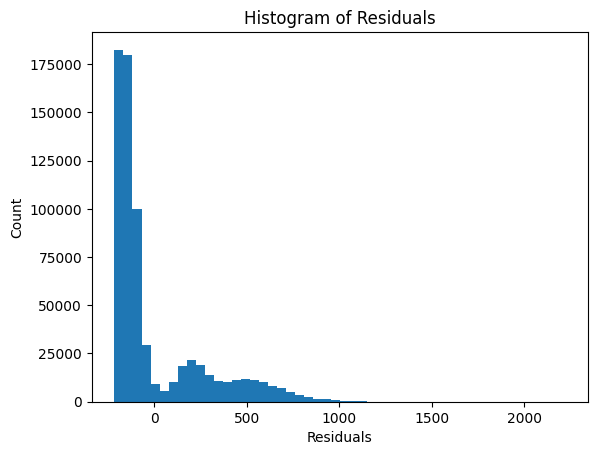

In [5]:
# I calculate the residuals
residuals = y_test - y_pred

# I create a histogram of the residuals
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

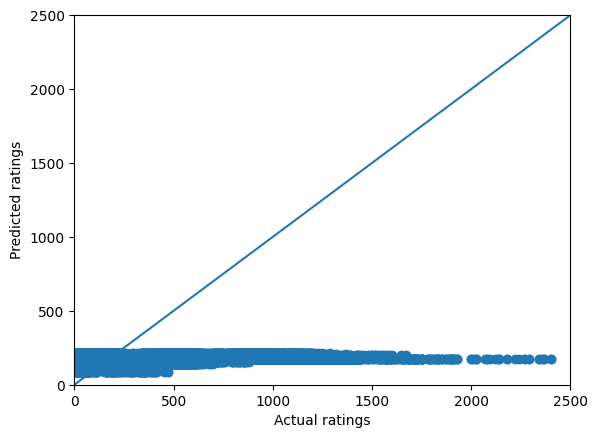

In [6]:
# I create a scatter plot of the predicted values against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual ratings')
plt.ylabel('Predicted ratings')
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.plot([0, 2500], [0, 2500])

With a Linear Regression model

In [7]:
# I create a linear regression object
lr = LinearRegression()

# I fit the model to the training data
lr.fit(X_train, y_train)

# I evaluate the model on the validation data
score_val2 = lr.score(X_val, y_val)
print("Validation Score: ", score_val2)

Validation Score:  7.030339261937524e-05


In [11]:
# I evaluate the model on the test data
score2 = lr.score(X_test, y_test)
print("R2 Score: ", score2)

R2 Score:  4.6079440049751064e-05


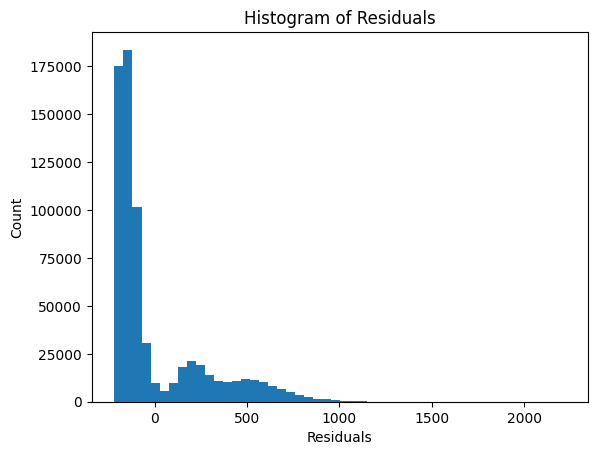

In [8]:
# I predict the values of y_pred
y_pred2 = lr.predict(X_test)

# I calculate the residuals
residuals = y_test - y_pred2

# I create a histogram of the residuals
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals')
plt.show()

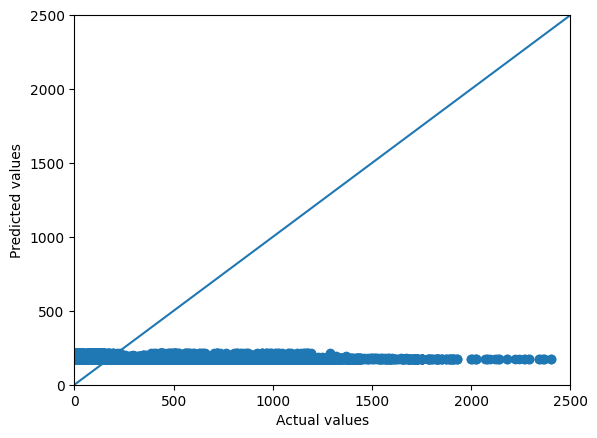

In [9]:
# Creating a scatter plot of the predicted values against the actual values
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.xlim(0, 2500)
plt.ylim(0, 2500)
plt.plot([0, 2500], [0, 2500])
plt.show()

In [13]:
## With linear algebra ##

# Adding a column of ones to the feature matrix for the intercept term
X_train_with_intercept = np.column_stack((np.ones(len(X_train)), X_train))

# Computing the optimal weights using the normal equation (X^T * X)^-1 * X^T * y
weights = np.linalg.inv(X_train_with_intercept.T @ X_train_with_intercept) @ X_train_with_intercept.T @ y_train

# Extracting the intercept and coefficients
intercept = weights[0]
coefficients = weights[1:]

# Adding a column of ones to the test feature matrix for the intercept term
X_test_with_intercept = np.column_stack((np.ones(len(X_test)), X_test))

# Calculating the predictions on the test data
y_test_pred = X_test_with_intercept @ weights

# Evaluating the model on the test data based on coefficient of determination
score = 1 - (np.sum((y_test - y_test_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))

# Printing the R2 score
print("R2 Score: ", score)

R2 Score:  4.6079440049751064e-05
